# Binary classification

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
%matplotlib inline

In [254]:
N_SAMPLES = 1000
TEST_SIZE = 0.1
N_EPOCHS = 50

## 1. Create a dataset

In [255]:
X, y = make_circles(n_samples=N_SAMPLES, factor=.3, noise=.10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

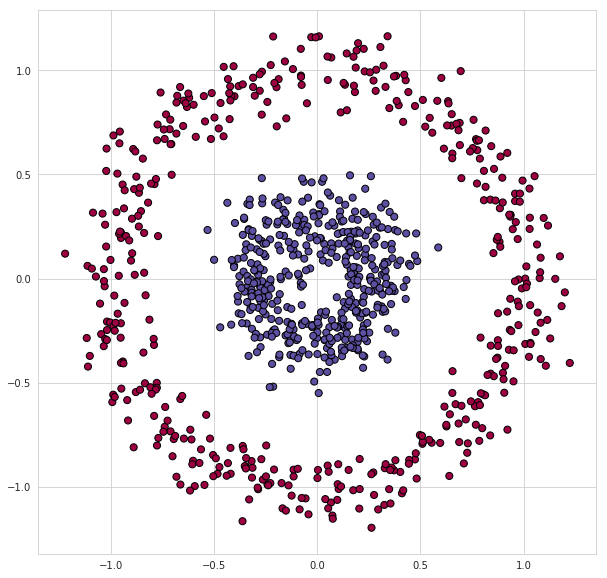

In [256]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black');
plt.savefig("./plots/dataset.png")

## 2.  Build model using Keras

In [275]:
grid = np.mgrid[-1.5:1.5:100j,-1.5:1.5:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
acc_history = []
loss_history = []

In [276]:
def makeIndexOfLength(index, length):
    indexStr = str(index)
    return ('0' * (length - len(indexStr)) + indexStr)

In [277]:
def save_model_prediction_graph(epoch, logs):
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    plt.title('Binary classification with KERAS - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.contourf(X, Y, prediction_probs.reshape(100, 100), alpha = 0.7, cmap=cm.Spectral)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')
    plt.savefig("./keras_visualization/keras" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()
    
    acc_history.append(logs['acc'])
    loss_history.append(logs['loss'])
    plt.figure(figsize=(12,8))
    sns.set_style("whitegrid")
    plt.plot(acc_history)
    plt.plot(loss_history)
    plt.title('Model accuracy and loss - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.xlim([0,N_EPOCHS])
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.savefig("./keras_visualization_loss_acc/loss_acc_" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()

In [278]:
testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=save_model_prediction_graph)

In [279]:
model = Sequential()
model.add(Dense(4, input_dim=2,activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [280]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [281]:
history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0, callbacks=[testmodelcb])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02857517411932349
Test accuracy: 1.0


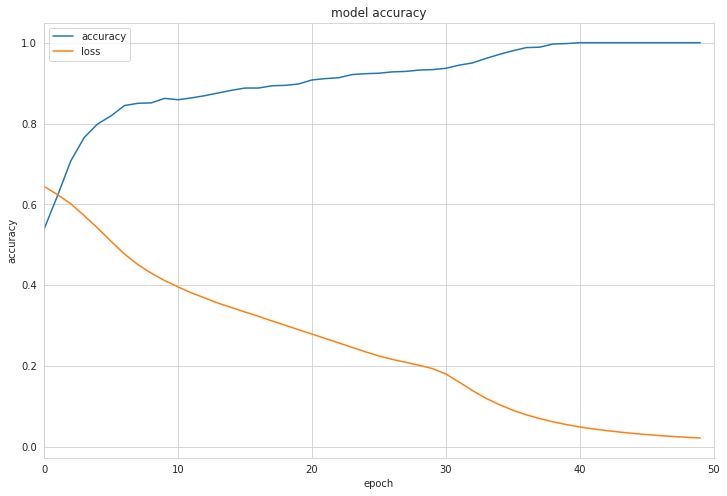

In [282]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xlim([0,N_EPOCHS])
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

<Figure size 432x288 with 0 Axes>

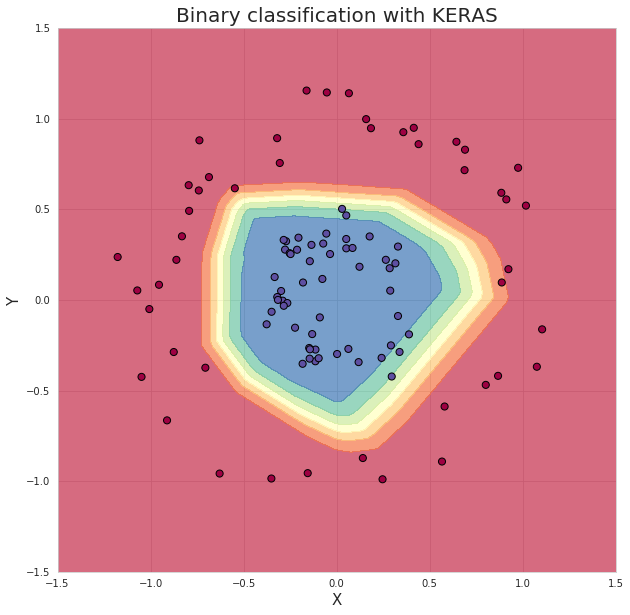

In [283]:
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)

plt.figure()
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
plt.title('Binary classification with KERAS', fontsize=20)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.contourf(X, Y, prediction_probs.reshape(100, 100), alpha = 0.7, cmap=cm.Spectral)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()

## Bibliography

1. <a href="https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/">
    How to Generate Test Datasets in Python with scikit-learn
</a>
2. <a href="https://playground.tensorflow.org/">
    Tensorflow playground
</a>
3. <a href="https://rubikscode.net/2018/02/12/implementing-simple-neural-network-using-keras-with-python-example/">
    Implementing Simple Neural Network using Keras – With Python Example
</a>